In [113]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

crime_data = pd.read_csv('Data/Ireland_Crime_Data.csv')

crime_data.head(10)


,STATISTIC Label,Year,Type of Offence,UNIT,VALUE
0,Recorded crime incidents,2003,Homicide offences,Number,100.0
1,Recorded crime incidents,2003,Murder,Number,35.0
2,Recorded crime incidents,2003,Manslaughter,Number,16.0
3,Recorded crime incidents,2003,Infanticide,Number,0.0
4,Recorded crime incidents,2003,Dangerous driving leading to death,Number,49.0
5,Recorded crime incidents,2003,Sexual offences,Number,1572.0
6,Recorded crime incidents,2003,Rape of a male or female,Number,325.0
7,Recorded crime incidents,2003,Defilement of a boy or girl less than 17 years...,Number,112.0
8,Recorded crime incidents,2003,Sexual offence involving mentally impaired person,Number,23.0
9,Recorded crime incidents,2003,Aggravated sexual assault,Number,11.0


In [114]:
crime_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1575 entries, 0 to 1574
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   STATISTIC Label  1575 non-null   object 
 1   Year             1575 non-null   int64  
 2   Type of Offence  1575 non-null   object 
 3   UNIT             1575 non-null   object 
 4   VALUE            1574 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 61.7+ KB


In [115]:
# plt.figure(figsize=(10, 6))
# sns.lineplot(data=crime_data, x='Year', y='VALUE', hue='Type of Offence')
# plt.title('Crime Types Over Time')
# plt.show()


In [116]:
# Print unique values in 'Type of Offence' column
print("Unique values in 'Type of Offence':")
print(crime_data['Type of Offence'].unique())

# Print unique values in 'Year' column
print("\nUnique values in 'Year':")
print(crime_data['Year'].unique())


Unique values in 'Type of Offence':
['Homicide offences' 'Murder' 'Manslaughter' 'Infanticide'
 'Dangerous driving leading to death' 'Sexual offences'
 'Rape of a male or female'
 'Defilement of a boy or girl less than 17 years old'
 'Sexual offence involving mentally impaired person'
 'Aggravated sexual assault' 'Sexual assault (not aggravated)'
 'Other sexual offences'
 'Attempts/threats to murder, assaults, harassments and related offences'
 'Murder-attempt' 'Threat to kill or cause serious harm'
 'Harassment and related offences' 'Assault causing harm, poisoning'
 'Other assault' 'Dangerous or negligent acts'
 'Dangerous driving causing serious bodily harm'
 'Driving/in charge of a vehicle while over legal alcohol limit'
 'Driving/in charge of a vehicle under the influence of drugs'
 'Endangerment with potential for serious harm/death'
 'Abandoning a child, child neglect and cruelty'
 'Unseaworthy/dangerous use of boat or ship'
 'False alarm/interference with aircraft or air transp

In [130]:
# Filter data for years X Year onwards
recent_crime_data = crime_data[crime_data['Year'] >= 2018]

# Sum occurrences of each crime type from X Year onwards
crime_counts = recent_crime_data.groupby('Type of Offence')['VALUE'].sum().sort_values(ascending=False)

# Plot the data
# plt.figure(figsize=(10, 8))
# sns.barplot(y=crime_counts.index, x=crime_counts.values, palette='viridis')
# plt.title('Frequency of Each Type of Offence (2021 Onwards)')
# plt.xlabel('Number of Occurrences')
# plt.ylabel('Type of Offence')
# plt.show()

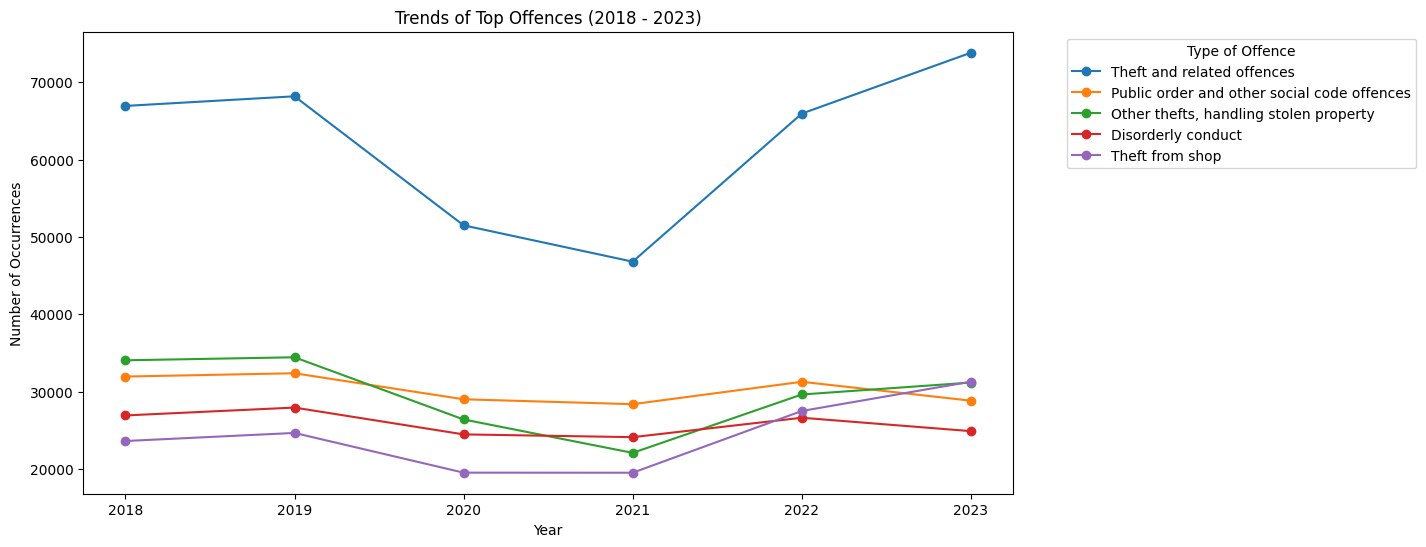

In [131]:
# Group by Year and Type of Offence, summing the 'VALUE' for each combination
crime_trends = recent_crime_data.groupby(['Year', 'Type of Offence'])['VALUE'].sum().unstack(fill_value=0)

# Plotting a subset of offences (top X most frequent offences)
top_offences = crime_counts.head(5).index  # Adjust number of offences as needed
crime_trends[top_offences].plot(kind='line', figsize=(12, 6), marker='o')
plt.title('Trends of Top Offences (2018 - 2023)')
plt.xlabel('Year')
plt.ylabel('Number of Occurrences')
plt.legend(title='Type of Offence', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [119]:
def plot_crime_data(data, start_year=2021, end_year=2023, num_offences=10, 
                    ascending=False, chart_type='bar'):
    """
    Plots crime data based on user preferences.
    
    Parameters:
    - data: DataFrame containing the crime data.
    - start_year: The starting year for filtering data.
    - end_year: The ending year for filtering data.
    - num_offences: Number of offence types to display.
    - ascending: If True, display offences in ascending order (least to most frequent).
    - chart_type: 'bar' for bar chart, 'line' for line chart.
    """
    
    # Filter data by the specified year range
    filtered_data = data[(data['Year'] >= start_year) & (data['Year'] <= end_year)]
    
    # Group by 'Type of Offence' and sum the 'VALUE' for each offence
    crime_counts = filtered_data.groupby('Type of Offence')['VALUE'].sum()
    
    # Sort the data based on frequency
    crime_counts = crime_counts.sort_values(ascending=ascending).head(num_offences)
    
    # Plot based on the chosen chart type
    
    if chart_type == 'bar':
        plt.figure(figsize=(12, 6))
        sns.barplot(y=crime_counts.index, x=crime_counts.values, palette='viridis')
        plt.xlabel('Number of Occurrences')
        plt.ylabel('Type of Offence')
        plt.title(f'Frequency of Top {num_offences} Offences from {start_year} to {end_year}')
    elif chart_type == 'line':
        # If line chart is chosen, group by year as well
        crime_trends = filtered_data.groupby(['Year', 'Type of Offence'])['VALUE'].sum().unstack(fill_value=0)
        top_offences = crime_counts.index
        crime_trends[top_offences].plot(kind='line', marker='o', figsize=(12, 6))
        plt.xlabel('Year')
        plt.ylabel('Number of Occurrences')
        plt.title(f'Trend of Top {num_offences} Offences from {start_year} to {end_year}')
        plt.legend(title='Type of Offence', bbox_to_anchor=(1.05, 1), loc='upper left')
    else:
        print("Invalid chart type. Choose 'bar' or 'line'.")
        return
    
    plt.show()

C:\Users\micha\AppData\Local\Temp\ipykernel_20216\1301257587.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=crime_counts.index, x=crime_counts.values, palette='viridis')


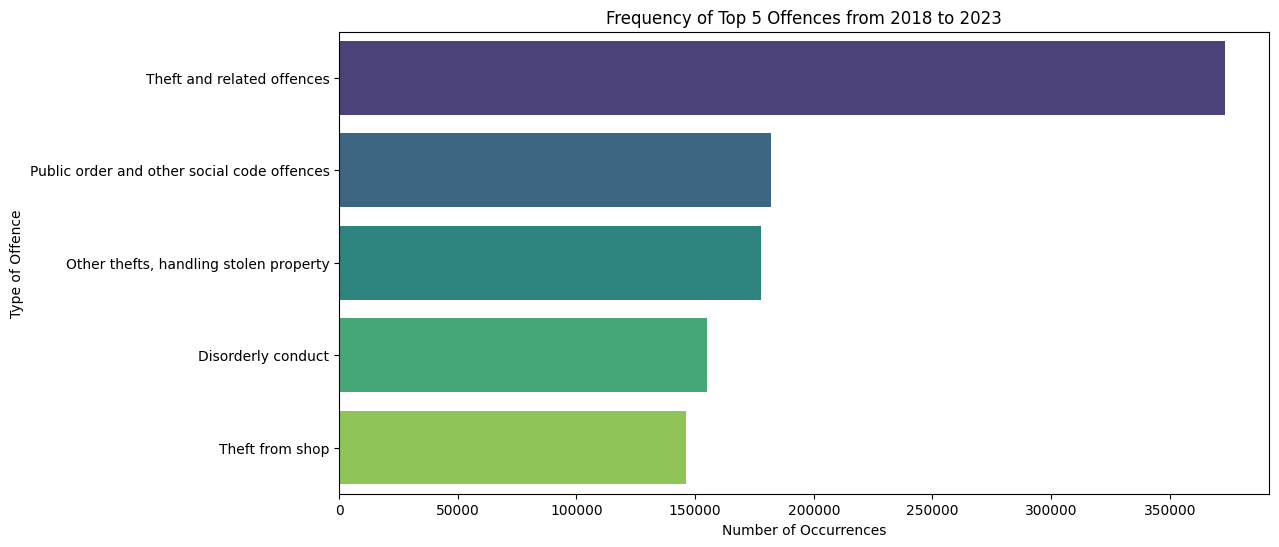

In [120]:
# Plot the top X offences from X Year to Y Year in descending/ascending order as a bar/line chart
plot_crime_data(crime_data, start_year=2018, end_year=2023, num_offences=5, ascending=False, chart_type='bar')

In [121]:
def plot_selected_crimes(data, offences=None, year_range=(2021, 2023), chart_type='line'):
    """
    Plots the trend or frequency of specific offences over a selected year range.
    
    Parameters:
    - data: DataFrame containing the crime data.
    - offences: List of specific offences to display. If None, displays all offences.
    - year_range: Tuple (start_year, end_year) to filter the year range.
    - chart_type: 'line' for line chart, 'bar' for bar chart.
    """
    
    # Filter data by the specified year range
    start_year, end_year = year_range
    filtered_data = data[(data['Year'] >= start_year) & (data['Year'] <= end_year)]
    
    # Filter by specific offences if provided
    if offences:
        filtered_data = filtered_data[filtered_data['Type of Offence'].isin(offences)]
    
    # Group by Year and Type of Offence, summing the 'VALUE' for each combination
    if chart_type == 'line':
        # Group data by year and offence for the line chart
        offence_trends = filtered_data.groupby(['Year', 'Type of Offence'])['VALUE'].sum().unstack(fill_value=0)
        
        # Plot the line chart
        plt.figure(figsize=(15, 10))
        ax = offence_trends.plot(kind='line', marker='o', figsize=(15, 10))
        plt.xlabel('Year')
        plt.ylabel('Number of Occurrences')
        plt.title(f'Trend of Selected Offences from {start_year} to {end_year}')
        plt.legend(title='Type of Offence', bbox_to_anchor=(1.05, 1), loc='upper left')

        # Add annotations for each data point
        for line in ax.get_lines():
            # Get the data for each line
            data_x = line.get_xdata()
            data_y = line.get_ydata()
            for x, y in zip(data_x, data_y):
                # Display only if y is non-zero for cleaner visualization
                if y != 0:
                    ax.text(x, y, f'{int(y)}', ha='center', va='bottom', fontsize=8, color=line.get_color())
    
    elif chart_type == 'bar':
        # Group data by offence type for the bar chart
        offence_totals = filtered_data.groupby('Type of Offence')['VALUE'].sum()
        
        # Plot the bar chart
        plt.figure(figsize=(12, 8))
        ax = sns.barplot(y=offence_totals.index, x=offence_totals.values, palette='viridis')
        plt.xlabel('Number of Occurrences')
        plt.ylabel('Type of Offence')
        plt.title(f'Frequency of Selected Offences from {start_year} to {end_year}')

        # Add annotations for each bar
        for i, value in enumerate(offence_totals.values):
            ax.text(value, i, f'{int(value)}', ha='left', va='center', fontsize=8, color='black')
    
    else:
        print("Invalid chart type. Choose 'line' or 'bar'.")
        return
    
    plt.show()

<Figure size 1500x1000 with 0 Axes>

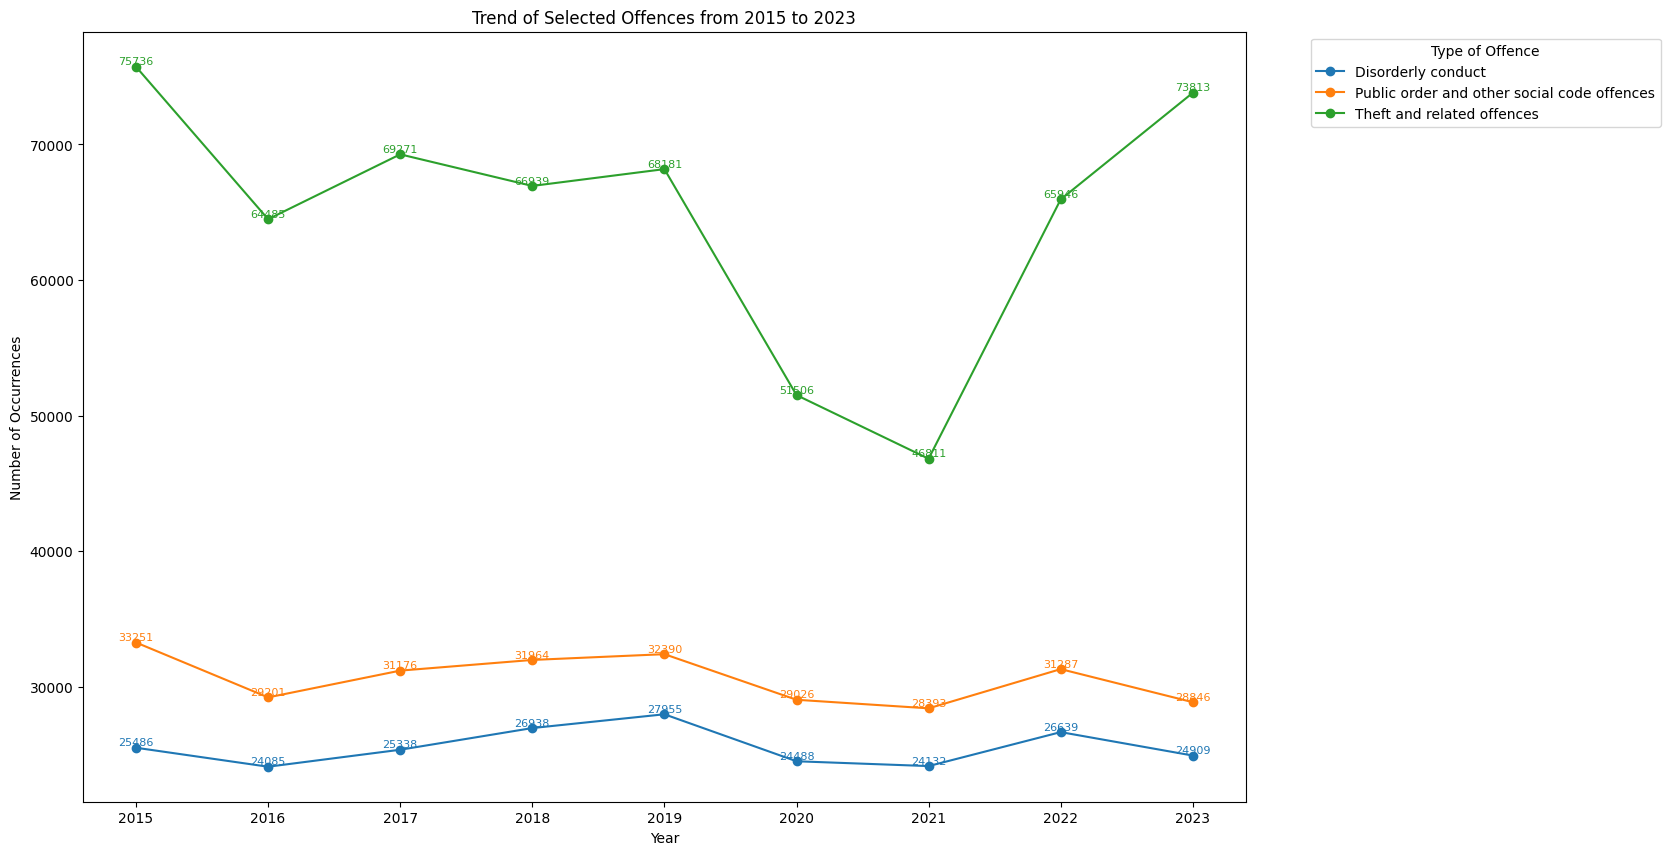

<Figure size 1500x1000 with 0 Axes>

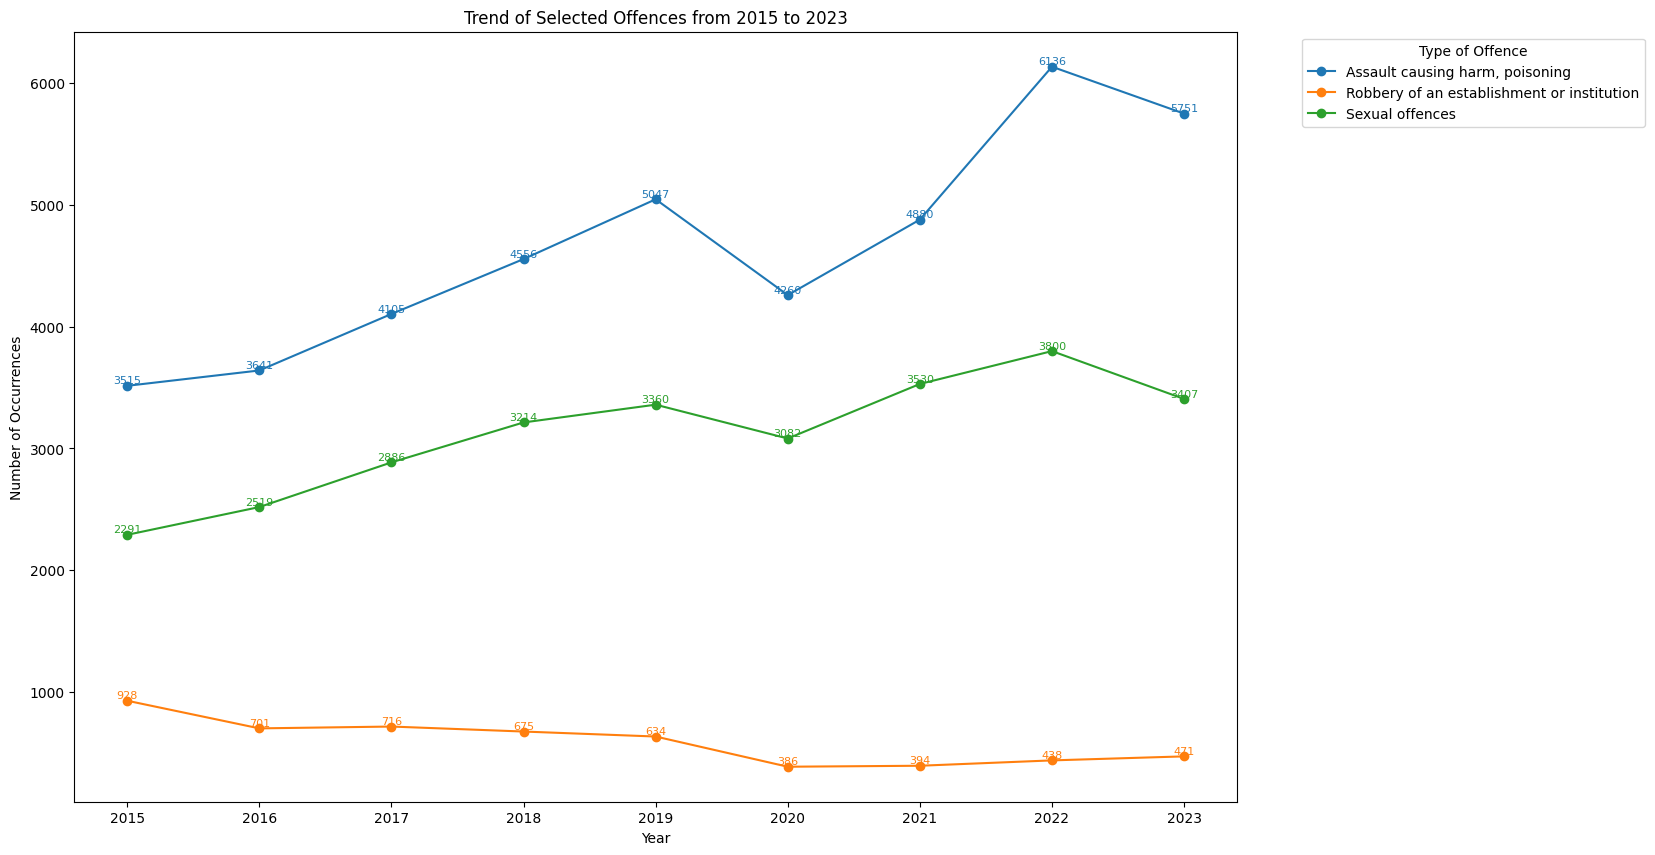

In [122]:
# Plot specific offences from X Year to Y Year as a bar/line chart
offences = ['Theft and related offences', 'Disorderly conduct', 'Public order and other social code offences']
plot_selected_crimes(crime_data, offences=offences, year_range=(2015, 2023), chart_type='line')

offences = ['Assault causing harm, poisoning', 'Sexual offences', 'Robbery of an establishment or institution']
plot_selected_crimes(crime_data, offences=offences, year_range=(2015, 2023), chart_type='line')

In [ ]:
def plot_filtered_crimes(data, occurrence_range=(0, float('inf')), year_range=(2021, 2023), 
                         ascending=False, chart_type='bar'):
    """
    Plots offences within a specified range of occurrences and years, ordered by occurrence count.
    
    Parameters:
    - data: DataFrame containing the crime data.
    - occurrence_range: Tuple (min_occurrences, max_occurrences) to filter by the number of occurrences.
    - year_range: Tuple (start_year, end_year) to filter the year range.
    - ascending: If True, display offences in ascending order (least to most frequent).
    - chart_type: 'bar' for bar chart, 'line' for line chart.
    """
    
    # Filter data by the specified year range
    start_year, end_year = year_range
    filtered_data = data[(data['Year'] >= start_year) & (data['Year'] <= end_year)]
    
    # Group by 'Type of Offence' and sum the 'VALUE' for each offence type across the selected years
    offence_totals = filtered_data.groupby('Type of Offence')['VALUE'].sum()
    
    # Filter by occurrence range
    min_occurrences, max_occurrences = occurrence_range
    offence_totals = offence_totals[(offence_totals >= min_occurrences) & (offence_totals <= max_occurrences)]
    
    # Sort the offences based on the occurrence count
    offence_totals = offence_totals.sort_values(ascending=ascending)
    
    # Plot the data based on the chosen chart type
    if chart_type == 'bar':
        plt.figure(figsize=(12, 8))
        sns.barplot(y=offence_totals.index, x=offence_totals.values, palette='viridis')
        plt.xlabel('Number of Occurrences')
        plt.ylabel('Type of Offence')
        plt.title(f'Selected Offences from {start_year} to {end_year} with {min_occurrences}-{max_occurrences} occurrences')
    elif chart_type == 'line':
        # Filter data to include only the selected offences
        selected_offences = offence_totals.index
        offence_trends = filtered_data[filtered_data['Type of Offence'].isin(selected_offences)]
        
        # Group by Year and Type of Offence, summing the 'VALUE' for each year-offence combination
        offence_trends = offence_trends.groupby(['Year', 'Type of Offence'])['VALUE'].sum().unstack(fill_value=0)
        
        # Plot the line chart with the selected offences
        plt.figure(figsize=(15, 10))
        offence_trends.plot(kind='line', marker='o', figsize=(15, 10))
        plt.xlabel('Year')
        plt.ylabel('Number of Occurrences')
        plt.title(f'Trends of Selected Offences from {start_year} to {end_year} with {min_occurrences}-{max_occurrences} occurrences')
        plt.legend(title='Type of Offence', bbox_to_anchor=(1.05, 1), loc='upper left')
    else:
        print("Invalid chart type. Choose 'bar' or 'line'.")
        return
    
    plt.show()

C:\Users\micha\AppData\Local\Temp\ipykernel_20216\1293418646.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=offence_totals.index, x=offence_totals.values, palette='viridis')


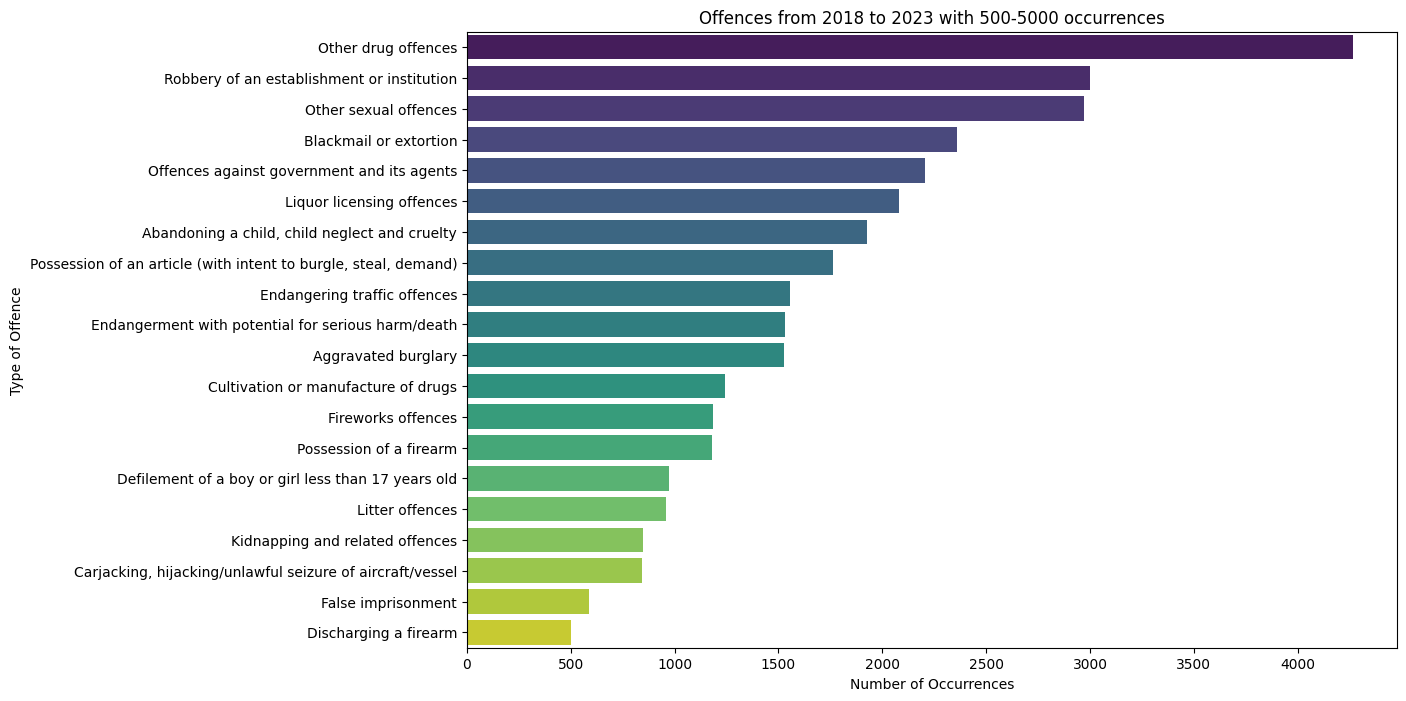

<Figure size 1500x1000 with 0 Axes>

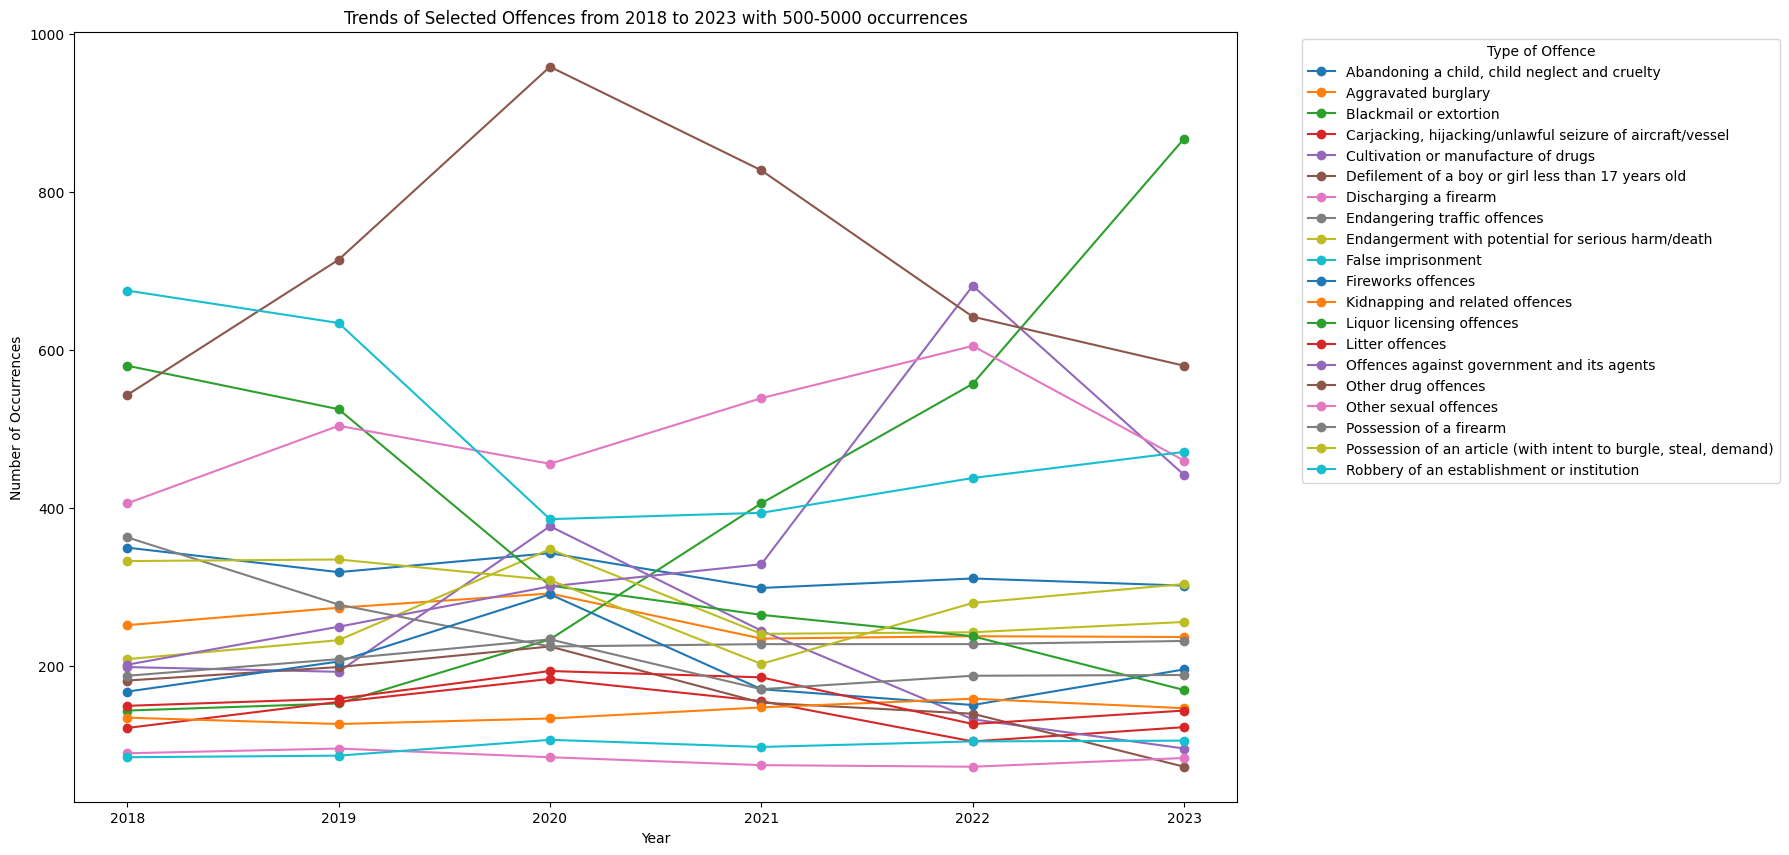

<Figure size 1500x1000 with 0 Axes>

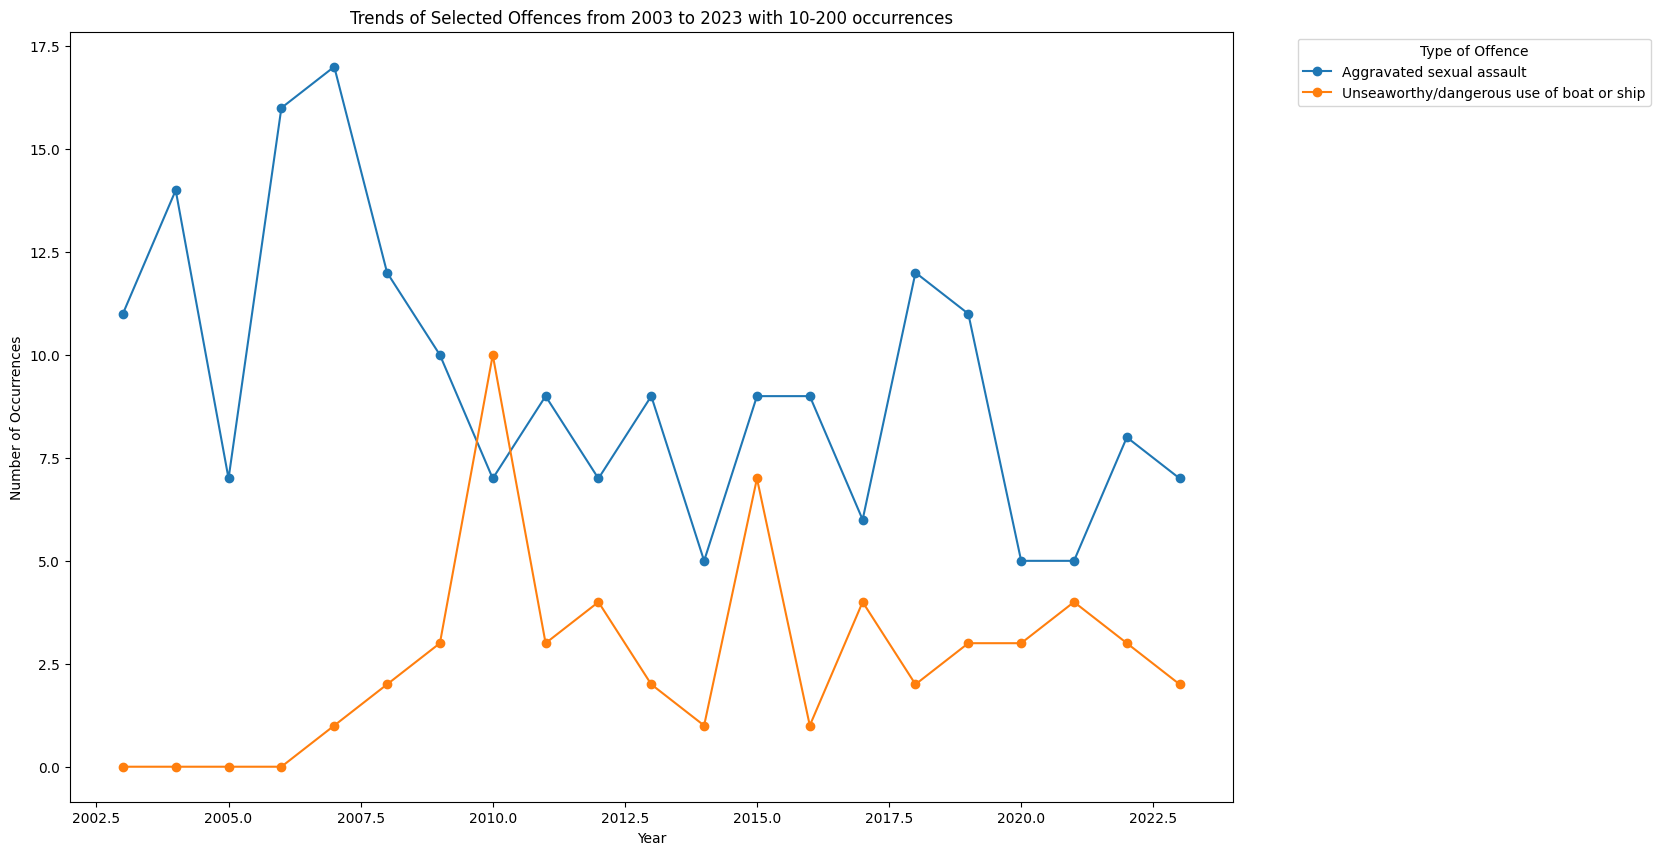

In [128]:
# Plot offences with X to Y occurrences, from X Year to Y Year, in descending/ascending order as a bar/line chart
plot_filtered_crimes(crime_data, occurrence_range=(500, 5000), year_range=(2018, 2023), ascending=False, chart_type='bar')
plot_filtered_crimes(crime_data, occurrence_range=(500, 5000), year_range=(2018, 2023), ascending=False, chart_type='line')

plot_filtered_crimes(crime_data, occurrence_range=(10, 200), year_range=(2003, 2023), ascending=True, chart_type='line')

# plot_filtered_crimes(crime_data, occurrence_range=(4000, float('inf')), year_range=(2018, 2023), ascending=False, chart_type='bar')
